<a href="https://colab.research.google.com/github/HimanshuJanbandhu/Wildfire-monitoring-using-Neural-Network/blob/main/Wildfire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("forestfires.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
1,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0,0
2,7,4,oct,tue,90.6,35.4,669.1,6.7,18,33,0.9,0,0
3,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0,0
4,8,6,mar,fri,91.7,33.3,77.5,9,8.3,97,4,0.2,0


In [ ]:
df.drop(df.columns[[0, 1, 2, 3, 12]], axis = 1, inplace = True)
df.head()

,4,5,6,7,8,9,10,11
0,FFMC,DMC,DC,ISI,temp,RH,wind,rain
1,86.2,26.2,94.3,5.1,8.2,51,6.7,0
2,90.6,35.4,669.1,6.7,18,33,0.9,0
3,90.6,43.7,686.9,6.7,14.6,33,1.3,0
4,91.7,33.3,77.5,9,8.3,97,4,0.2


In [ ]:
num_df = df.to_numpy()
X = num_df[1:,:]
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.87096774, 0.08649207, 0.1013252 , ..., 0.42352941, 0.7       ,
        0.        ],
       [0.92774194, 0.11819435, 0.77541926, ..., 0.21176471, 0.05555556,
        0.        ],
       [0.92774194, 0.14679531, 0.79629412, ..., 0.21176471, 0.1       ,
        0.        ],
       ...,
       [0.8116129 , 0.19159201, 0.77131465, ..., 0.64705882, 0.7       ,
        0.        ],
       [0.97677419, 0.49931082, 0.71162191, ..., 0.31764706, 0.4       ,
        0.        ],
       [0.78451613, 0.00654721, 0.11586725, ..., 0.18823529, 0.45555556,
        0.        ]])

In [ ]:
# svdX = TruncatedSVD(n_components = 4)
# Xf = svdX.fit_transform(X_scale)
Xf = X_scale
Xf

array([[0.87096774, 0.08649207, 0.1013252 , ..., 0.42352941, 0.7       ,
        0.        ],
       [0.92774194, 0.11819435, 0.77541926, ..., 0.21176471, 0.05555556,
        0.        ],
       [0.92774194, 0.14679531, 0.79629412, ..., 0.21176471, 0.1       ,
        0.        ],
       ...,
       [0.8116129 , 0.19159201, 0.77131465, ..., 0.64705882, 0.7       ,
        0.        ],
       [0.97677419, 0.49931082, 0.71162191, ..., 0.31764706, 0.4       ,
        0.        ],
       [0.78451613, 0.00654721, 0.11586725, ..., 0.18823529, 0.45555556,
        0.        ]])

In [ ]:
svdY =  TruncatedSVD(n_components = 1)
VI = svdY.fit_transform(X_scale)
Y = VI
Y

array([[1.00862536],
       [1.26324466],
       [1.2515078 ],
       [1.10601124],
       [1.09426604],
       [1.42216288],
       [1.36421379],
       [1.41669088],
       [1.53280545],
       [1.52075434],
       [1.58821504],
       [1.49985642],
       [1.33335354],
       [1.46983898],
       [1.57973946],
       [1.65668363],
       [1.03985922],
       [1.3491461 ],
       [0.99197491],
       [0.93858689],
       [1.44983424],
       [1.43303688],
       [1.37616542],
       [1.45718767],
       [1.59313908],
       [1.53723834],
       [1.53462662],
       [1.43547598],
       [1.60500201],
       [1.59189734],
       [1.52263787],
       [1.57192364],
       [1.36947104],
       [1.43648529],
       [1.44218939],
       [1.53098961],
       [1.39441622],
       [1.40663866],
       [1.35719654],
       [0.93398978],
       [1.16396175],
       [1.50787064],
       [1.55736131],
       [1.46366463],
       [1.51473257],
       [1.54108405],
       [1.50951943],
       [1.341

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(Xf, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(361, 8) (78, 8) (78, 8) (361, 1) (78, 1) (78, 1)


In [ ]:
def tansig(x):
    return K.tanh(x/2)

def purelin(x):
    return x

get_custom_objects().update({'tansig': Activation(tansig)})
get_custom_objects().update({'purelin': Activation(purelin)})

In [ ]:
model = Sequential([
    Dense(32, activation='tansig', input_shape=(8,)),
    Dense(32, activation='purelin'),
    Dense(1, activation='purelin'),
])

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_squared_error'])

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
12/12 [==============================] - 1s 25ms/step - loss: 1.7873 - mean_squared_error: 1.7873 - val_loss: 0.7245 - val_mean_squared_error: 0.7245
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5434 - mean_squared_error: 0.5434 - val_loss: 0.0644 - val_mean_squared_error: 0.0644
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 7/100
12/12 [==============

In [ ]:
model.evaluate(X_test, Y_test)[1]

3/3 [==============================] - 0s 4ms/step - loss: 9.7078e-05 - mean_squared_error: 9.7078e-05


9.707817662274465e-05

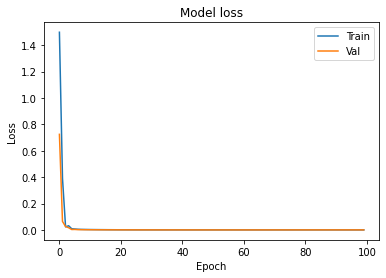

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
